<a href="https://colab.research.google.com/github/smcck222/Used-Cars-EDA-and-Price-Prediction/blob/main/Used_Cars_EDA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:** 

Predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

### Importing Necessary Libraries 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import matplotlib.mlab as mlab
import numpy as np 
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Basic Data Pre-processing

In [ ]:
data = pd.read_csv("Data_Train.csv")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
data.describe()
# We want to involve the other numerical attributes as well. 

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
data.columns.to_list()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [ ]:
data.isnull().sum()
# Checked and verified that all these null values are NaN entries. 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
# Mileage is in Km/Kg and Kmpl. Need to convert all to one standard unit. 
# Ok apparently we are not required to do that.

In [ ]:
# Removing units from all numeric data columns and converting them to int64/float64 datatype.
data['Mileage'] = data['Mileage'].astype(str).str.replace(' km/kg', '')
data['Mileage'] = data['Mileage'].astype(str).str.replace(' kmpl', '')
data['Engine'] = data['Engine'].astype(str).str.replace(' CC', '')
data['Power'] = data['Power'].astype(str).str.replace(' bhp', '')

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [ ]:
# Creating a new column with the company names rather than the entire name of the car. 

data['Brand']=data['Name'].apply(lambda x: x.split(' ')[0])
data['Model']=data['Name'].apply(lambda x: x.split(' ')[1])
data.drop('Name',axis=1,inplace=True)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi,A4


In [ ]:
data.dtypes
# These need to be either int64/float64 if we want to proceed.

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

In [ ]:
print(len(data['Brand'].unique()))
print(len(data['Location'].unique()))

31
11


In [ ]:
from numpy import nan
print(len(data[data['Power'] == 'null']))  
# We have more than just NaN values in the data. Let's make null as NaN in this column.

107


In [ ]:
data.loc[data["Power"]=="null",'Power'] = nan

In [ ]:

# Converting all numeric columns to appropriate dtypes. 

data['Mileage' ] = data['Mileage'].astype(np.float64)
data['Engine'] = data['Engine'].astype(np.float64)
data['Power'] = data['Power'].astype(np.float64)

In [ ]:
data.dtypes
# Data Types fixed. 

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

### Handling NULL Values 

In [ ]:
data.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
Model                  0
dtype: int64

In [ ]:
# We replace numeric attributes with mean value. 
# We replace categorical attributes with mode value. 

num=['Engine','Power','Mileage']
cat=['Seats']

for i in num:
    data[i].fillna(data[i].median(),inplace=True)

for i in cat:
    data[i].fillna(data[i].mode()[0],inplace=True)

data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [ ]:
# Checking description again. 
data.describe()

# Things that look strange here: 
# 1. The minimum Mileage is 0, which is not possible. 
# 2. Is a minimum of 72cc displacement volume (Engine) normal? 
# 3. The std dev for Engine is high. 
# 4. The minimum number of seats were 0 (which we fixed, by replacing with the mean) 
# 5. The minimum price of a car is 0.44 Lakhs, Rs 44,000 ( this needs to be a second hand car) 
# 6. The maximum km driven is 65,00,000 km. This is probably an outlier. 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.277621,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.803479,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


### Feature Importance and Visualizations

In [ ]:
# Read cleaned out data file. (Before NULL imputation + Outlier Handling)

data = pd.read_csv("verzeo_data_cleaned.csv")

In [ ]:
data.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


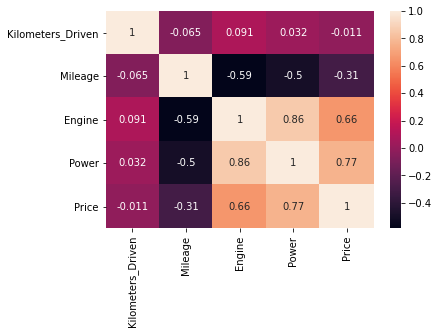

In [ ]:
# Correlation between different numerical attributes. 
df1 = data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']]
sb.heatmap(df1.corr(), annot=True)

From the heatmap above, we can see that **Power and Engine** are strongly correlated.
Also, since there is a fairly high correation between **Price and Power**, there is also a correlation between **Price and Engine**.
*Kilometers driven* have very little and *mileage* has a weak correlation with *Price*.

<Figure size 1440x720 with 0 Axes>

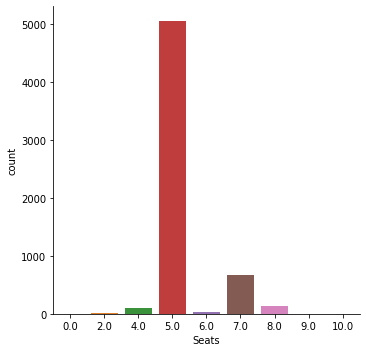

In [ ]:
plt.figure(figsize=(20,10))
#data=data[data['Seats']!=0]
df=data[['Seats','Price']]
sb.catplot(x='Seats',kind='count',data=df)
#sb.countplot(df['Seats'])

The highest number of cars have 5 seats. There is also recrods with zero seats which is not possible and will have to be handled in outlier removal.

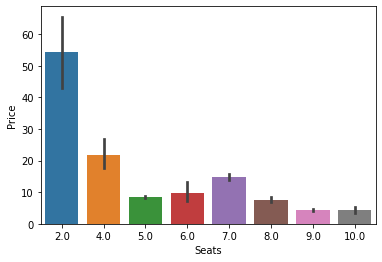

In [ ]:
sb.barplot(x="Seats",y="Price",data=data)

On an average, the most expensive vehicles are two seaters, followed by 4,7,6,5 and 8.

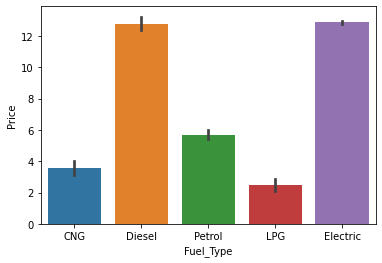

In [ ]:
df=data[['Fuel_Type','Price']]
sb.barplot(x="Fuel_Type",y="Price",data=df)

Electric and diesel cars cost way higher than other fuel types. But diesel cars cost a bit more than electric in the dataset given.

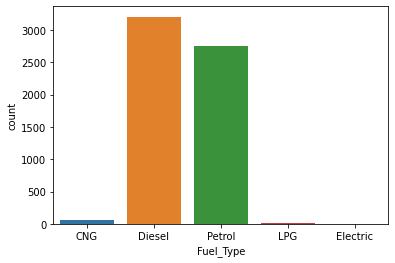

In [ ]:
sb.countplot(data['Fuel_Type'])

Most of the cars are diesel based. There are only 2 records of electric cars. Petrol comes in second. Thus we conclude that chances of a car being expensive and diesel are high. Thus fuel types have an influence on Price.

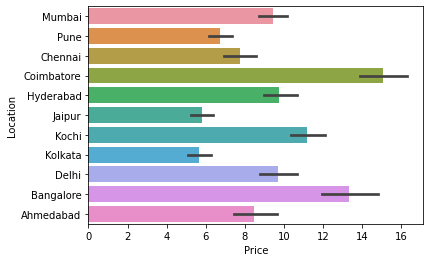

In [ ]:
sb.barplot(y=data['Location'],x=data['Price'])

Cars from Coimbatore and Bangalore have the highest prices. 

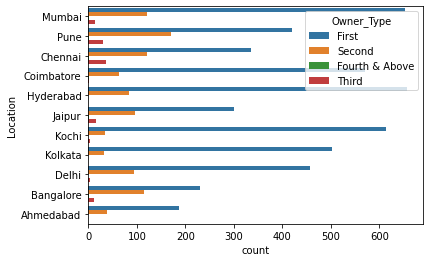

In [ ]:
sb.countplot(y='Location',data=data,hue='Owner_Type')

Hyderabad has the highest owners of First Hand cars. 

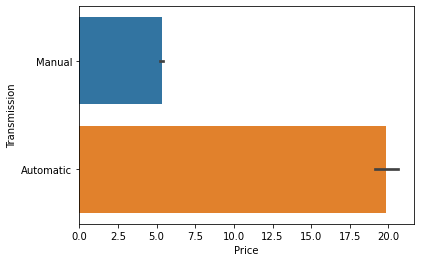

In [ ]:
sb.barplot(y=data['Transmission'],x=data['Price'])

Automatic Cars are priced higher than Manual cars on an average. 

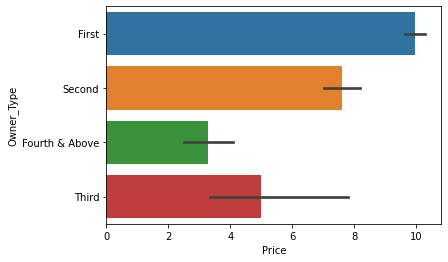

In [ ]:
sb.barplot(y=data['Owner_Type'],x=data['Price'])

First hand cars are priced higher, followed by the order above, which is logically sound. 

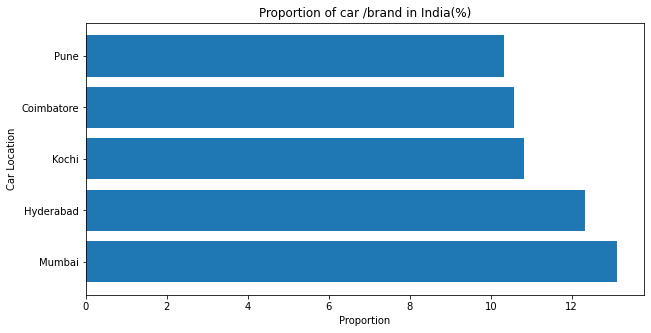

In [ ]:
# Percentage of car per Location. 
counts = data['Location'].value_counts()*100/sum(data['Location'].value_counts())

# 5 of the most present Locations. 
popular_labels = counts.index[:5]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:5])
plt.title('Proportion of car /brand in India(%)')
plt.xlabel('Proportion')
plt.ylabel('Car Location')
plt.show()

In [ ]:
print(len(counts)) 
print(sum(counts[:10]))


11
96.27845157002825


Over 11 different states , the 5 most recurrent states in that dataset
represents 96.27 % of the total cars.

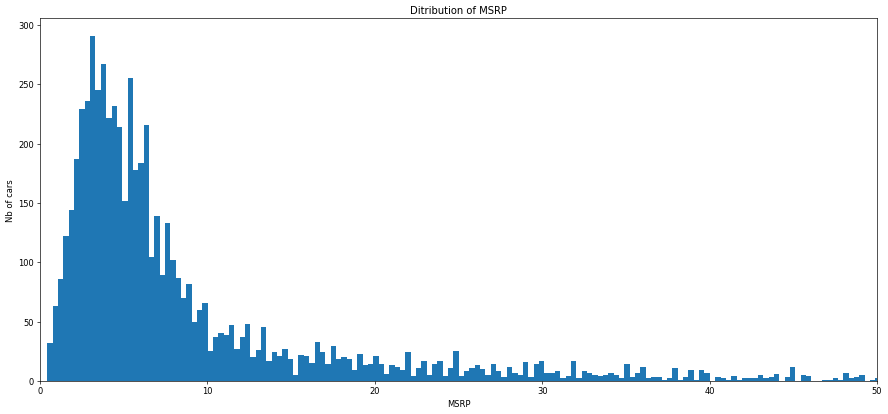

In [ ]:
fig = plt.figure(figsize=(18,8), dpi = 60)
plt.hist(data['Price'].values, bins = 500)
plt.title('Ditribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Nb of cars')
plt.xlim([0,50])
plt.show()

In [ ]:
print(sum(data['Price']>40),"cars worth more than 4k")
print(sum(data['Price']>20),"cars worth more than 2k")
print(sum(data['Price']>50),"cars worth more than 5k")
print("Most expensive car costs", max(data['Price']))
print("There are",sum(data['Price']<50),"cars worth less than 5k")

171 cars worth more than 4k
689 cars worth more than 2k
90 cars worth more than 5k
Most expensive car costs 160.0
There are 5928 cars worth less than 5k


In [ ]:
# Rearrange feature names so they match the sorted feature importances
def plot_feature_selection(indices, df):
  
  names = []
  for x in indices: 
    names.append(df.columns[x])

  # Create plot
  plt.figure()

  # Create plot title
  plt.title("Feature Importance")

  # Add bars
  plt.bar(range(X.shape[1]), importances[indices])

  # Add feature names as x-axis labels
  plt.xticks(range(X.shape[1]), names, rotation=90)

  # Show plot
  plt.show()

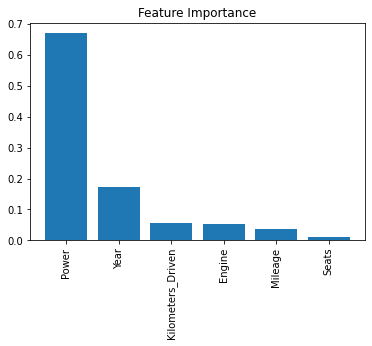

In [ ]:
# Finding Feature Importance with RandomForestRegressor.

from sklearn.ensemble import RandomForestRegressor 
 
# Dependant variable.
y = data['Price'].values
# Independent variables.
data1 = data[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats', 'Year' ]]
X = data1.values 
# The features need to be scaled to proceed. 
scaler = StandardScaler()
X = scaler.fit_transform(X) 


regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(X, y)

importances = regressor.feature_importances_

indices = np.argsort(importances)[::-1]
plot_feature_selection(indices, data1)

### Handling Outliers and Encoding Data

This was done in a separate notebook, but the results can be viewed here. Do not run the cells under this section as the intermediary data was generated at runtime. 

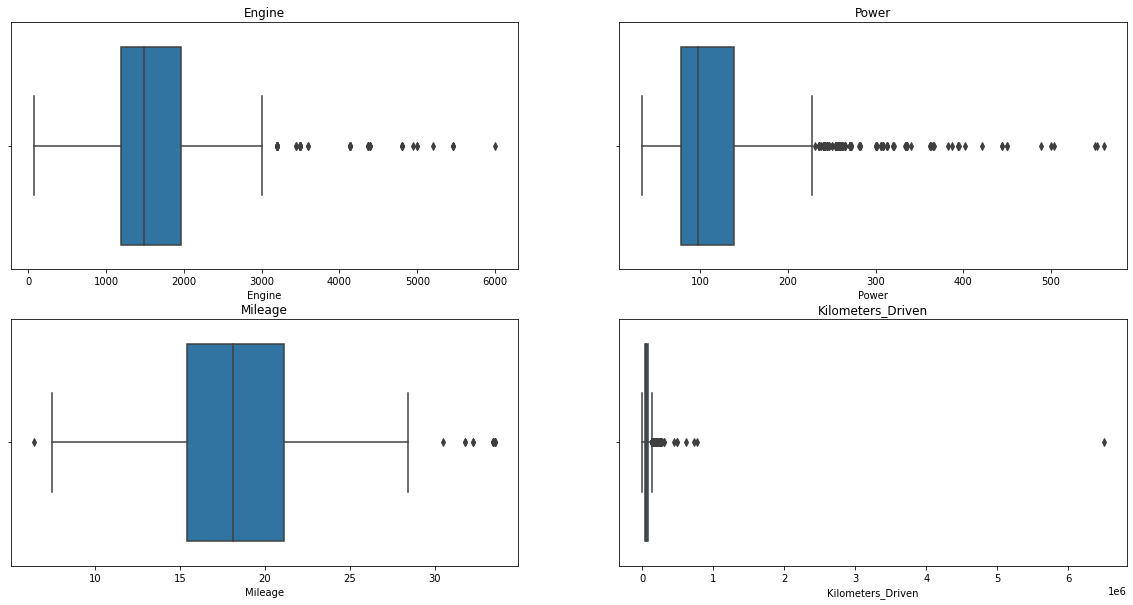

In [ ]:
num=['Engine','Power','Mileage','Kilometers_Driven']

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title(num[0])
sb.boxplot(data[num[0]])
plt.subplot(222)
plt.title(num[1])
sb.boxplot(data[num[1]])
plt.subplot(223)
plt.title(num[2])
sb.boxplot(data[num[2]])
plt.subplot(224)
plt.title(num[3])
sb.boxplot(data[num[3]])

In [ ]:
# We observe from above that the minimum number of seats in a car is 0. 
# We need to fix that column. Googling the car will give us the actual number of seats which is 5. 

data[data['Seats'] == 0]

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
3999,3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0,Audi,A4


In [ ]:
data.loc[data["Seats"] == 0 ,'Seats'] = 5.0

In [ ]:
# We also similarly observe that the minimum Mileage is 0. 
# This also needs to be fixed. 

print("No. of rows with mileage as zero: ", len(data[data['Mileage'] == 0]))
data[data['Mileage'] == 0]

No. of rows with mileage as zero:  68


,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
14,14,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50,Land,Rover
67,67,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67,Mercedes-Benz,C-Class
79,79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,97.7,5.0,1.30,Hyundai,Santro
194,194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493.0,97.7,5.0,2.95,Honda,City
229,229,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,5.0,3.60,Ford,Figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,5647,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,97.7,8.0,2.20,Toyota,Qualis
5875,5875,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.00,Mercedes-Benz,C-Class
5943,5943,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,97.7,6.0,1.70,Mahindra,Jeep
5972,5972,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,1.39,Hyundai,Santro


In [ ]:
# Removing all Mileage = 0 / replacing them with the mean/median

data.loc[data["Mileage"] == 0,'Mileage'] = data["Mileage"].median()

In [ ]:
# Interquartile Range method. 

def outliers_iqr(df , column):
  global lower,upper
  q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  # calculate the IQR
  iqr = q75 - q25
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  # calculate the lower and upper bound value
  lower, upper = q25 - cut_off, q75 + cut_off
  print(column)

  print('The IQR is',iqr)
  print('The lower bound value is', lower)
  print('The upper bound value is', upper)
  # Calculate the number of records below and above lower and above bound value respectively
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  print("Outliers Percentage (%) of data: " + '%.2f'%(((df1.shape[0]+df2.shape[0])/len(data))*100) )
  
  print('Total number of outliers above upper bound and below lower bound are: ' + str(df1.shape[0]) + " and " + str(df2.shape[0]) )

  return(df1.shape[0] + df2.shape[1])

In [ ]:
outlier_sum = 0
outlier_sum += outliers_iqr(data, 'Kilometers_Driven')
outlier_sum += outliers_iqr(data, 'Mileage')
outlier_sum += outliers_iqr(data, 'Engine')
outlier_sum += outliers_iqr(data, 'Power')
outlier_sum += outliers_iqr(data, 'Price')

print("\nTotal Number of Outliers: ", outlier_sum)  # Worst case assuming there are no overlaps. 
print("(%) of Outlier Data: " + '%.2f'%((outlier_sum/len(data))*100) )

Kilometers_Driven
The IQR is 39000.0
The lower bound value is -24500.0
The upper bound value is 131500.0
Outliers Percentage (%) of data: 3.36
Total number of outliers above upper bound and below lower bound are: 202 and 0
Mileage
The IQR is 5.700000000000001
The lower bound value is 6.85
The upper bound value is 29.650000000000002
Outliers Percentage (%) of data: 0.25
Total number of outliers above upper bound and below lower bound are: 14 and 1
Engine
The IQR is 771.0
The lower bound value is 41.5
The upper bound value is 3125.5
Outliers Percentage (%) of data: 1.01
Total number of outliers above upper bound and below lower bound are: 61 and 0
Power
The IQR is 60.03
The lower bound value is -12.045000000000002
The upper bound value is 228.075
Outliers Percentage (%) of data: 3.97
Total number of outliers above upper bound and below lower bound are: 239 and 0
Price
The IQR is 6.449999999999999
The lower bound value is -6.174999999999999
The upper bound value is 19.625
Outliers Percent

1493.0
61
0


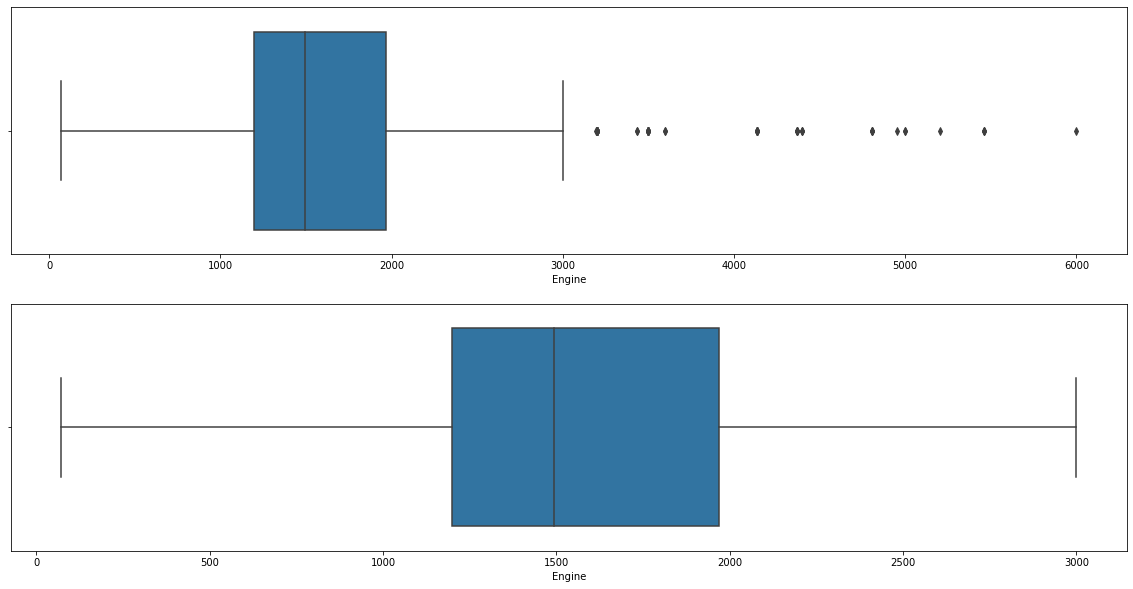

In [ ]:
engine_median=data[~((data.Engine > 3125.5))].Engine.median()
print(engine_median)
print(len(data[data['Engine']>3125.5]))

plt.figure(figsize=(20,10))
plt.subplot(211)
sb.boxplot(data.Engine)
data.loc[data['Engine']>3125.5,'Engine']=engine_median
print(len(data[data['Engine']>3125.5]))
plt.subplot(212)
sb.boxplot(data.Engine)

93.0
239
0


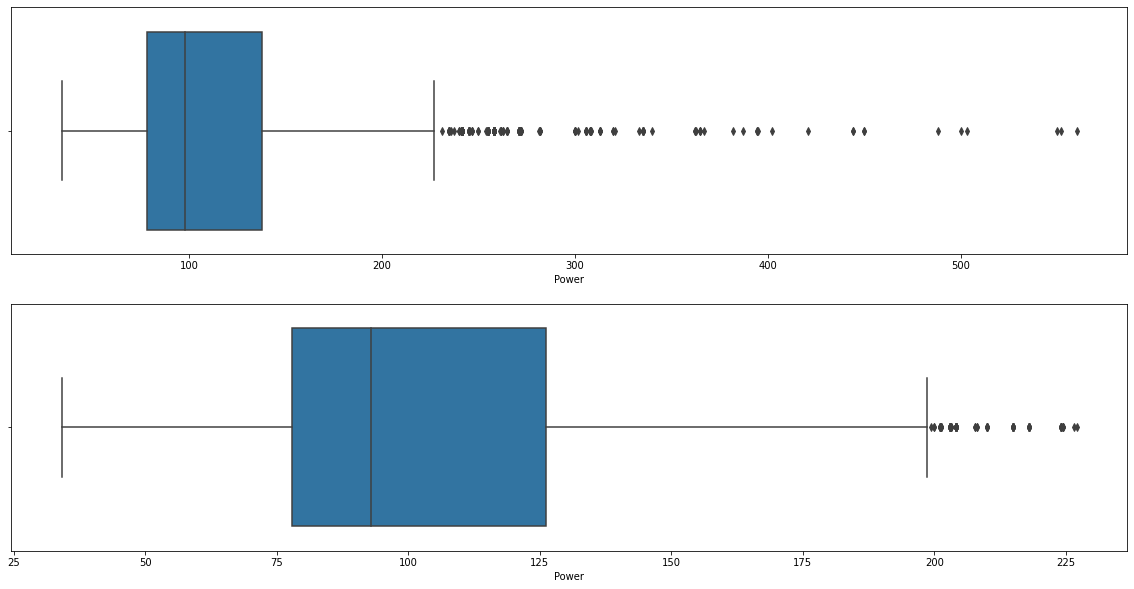

In [ ]:
power_median=data[~((data.Power > 228))].Power.median()
print(power_median)
print(len(data[data['Power']>228]))
plt.figure(figsize=(20,10))
plt.subplot(211)
sb.boxplot(data.Power)
data.loc[data['Power']>228,'Power']=power_median
print(len(data[data['Power']>228]))
plt.subplot(212)
sb.boxplot(data.Power)

52000.0
202
0


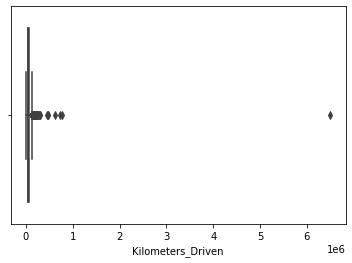

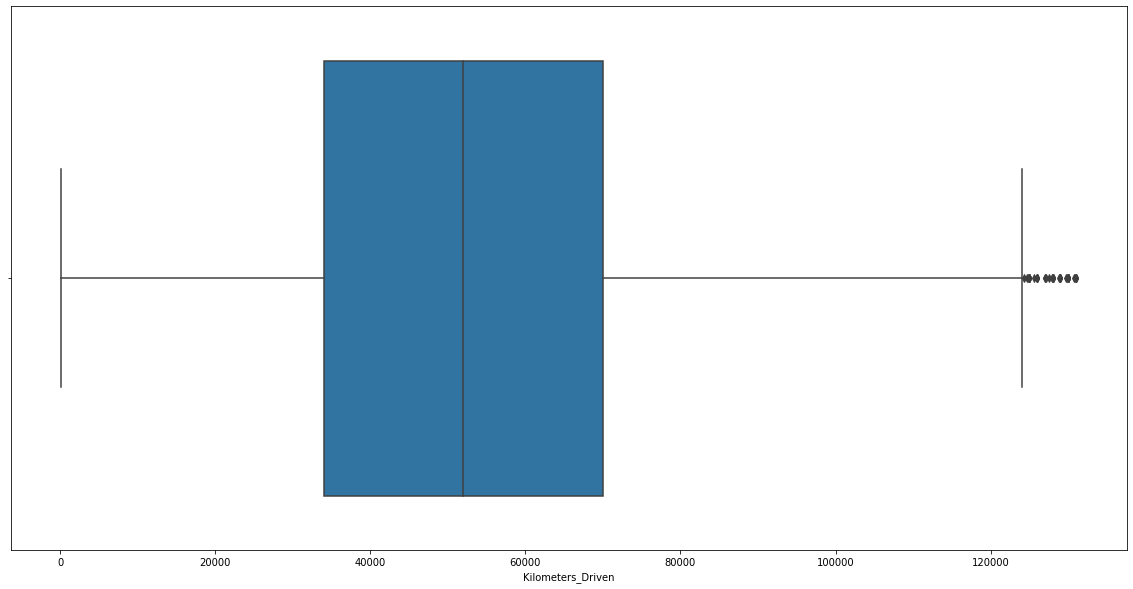

In [ ]:
sb.boxplot(data.Kilometers_Driven)
driven_median=data[~((data.Kilometers_Driven > 131500))].Kilometers_Driven.median()
print(driven_median)
print(len(data[data['Kilometers_Driven']>131500]))
data.loc[data['Kilometers_Driven']>131500,'Kilometers_Driven']=driven_median
print(len(data[data['Kilometers_Driven']>131500]))
plt.figure(figsize=(20,10))
sb.boxplot(data.Kilometers_Driven)

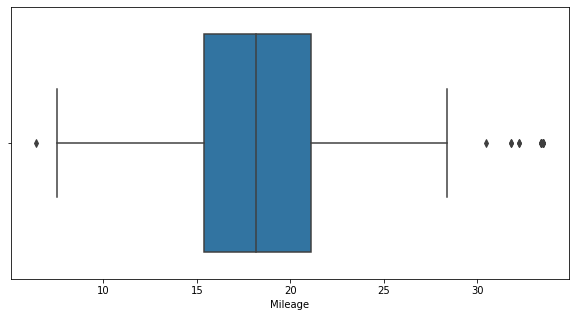

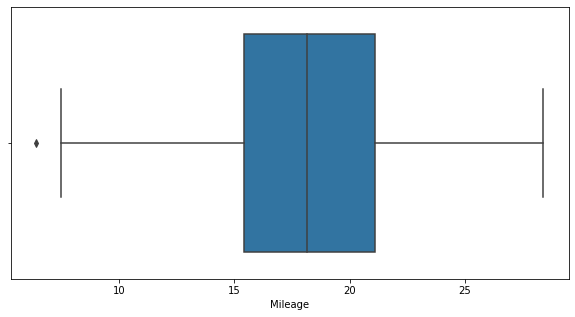

In [ ]:
#Handling outliers in Mileage
mileage_median=data[~((data.Mileage < (6.27)) |(data.Mileage > (29.99)))].Mileage.median()
mileage_median

plt.figure(figsize=(10,5))
sb.boxplot(data.Mileage)
data.loc[data['Mileage']<6.27,'Mileage']=mileage_median
data.loc[data['Mileage']>29.99,'Mileage']=mileage_median
plt.figure(figsize=(10,5))
sb.boxplot(data.Mileage)

In [ ]:
# One Hot Encoding. 
#dummies = pd.get_dummies(data[ [ 'Location','Brand', 'Seats'] ] )
dummies = pd.get_dummies(data[ [ 'Location','Brand', 'Seats', 'Transmission', 'Owner_Type', 'Fuel_Type'] ] )

In [ ]:
new = pd.concat([data, dummies ],axis = 'columns')

In [ ]:
# Label Encoding (Manually)
# This was tried out for different versions. But not considered for the final.
#new = new.replace({'Transmission':{'Manual':0,'Automatic':1}})
#new = new.replace({'Owner_Type':{'First':3, 'Second':2, 'Third':1, 'Fourth & Above': 0}})
#new = new.replace({'Fuel_Type':{'Electric':4, 'Diesel':3, 'Petrol':2, 'CNG':1, 'LPG': 0}})

In [ ]:
# Label Encoding Year 

le = preprocessing.LabelEncoder()
le.fit(new['Year'])
new['Year']=le.transform(new['Year'])

In [ ]:
new = new.drop(['Location', 'Brand', 'Model', 'Seats'], axis=1)

Similar encoding was done for the testing data as well. 

## Training Models 

### Data Split and Prep. 

In [ ]:
# Read cleaned out data file. 

data = pd.read_csv("v3_train_data.csv")
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,...,Model_i20 Active SX Diesel,Model_i20 Active SX Dual Tone Petrol,Model_i20 Active SX Petrol,Model_i20 Asta,Model_i20 Asta (o),Model_i20 Asta (o) 1.4 CRDi (Diesel),Model_i20 Asta 1.2,Model_i20 Asta 1.4 CRDi,Model_i20 Asta 1.4 CRDi (Diesel),Model_i20 Asta Option 1.2,Model_i20 Asta Option 1.4 CRDi,Model_i20 Asta Optional with Sunroof 1.2,Model_i20 Diesel Asta Option,Model_i20 Era 1.4 CRDi,Model_i20 Magna,Model_i20 Magna 1.2,Model_i20 Magna 1.4 CRDi,Model_i20 Magna 1.4 CRDi (Diesel),Model_i20 Magna Optional 1.2,Model_i20 Magna Optional 1.4 CRDi,Model_i20 Sportz 1.2,Model_i20 Sportz 1.4 CRDi,Model_i20 Sportz AT 1.4,Model_i20 Sportz Diesel,Model_i20 Sportz Option,Model_i20 Sportz Option 1.2,Model_i20 Sportz Option Diesel,Model_i20 Sportz Petrol,Model_redi-GO S,Model_redi-GO T,Model_redi-GO T Option,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Price
0,12,72000,26.60,998.0,58.16,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.75
1,17,41000,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12.50
2,13,46000,18.20,1199.0,88.70,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.50
3,14,87000,20.77,1248.0,88.76,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6.00
4,15,40670,15.20,1968.0,140.80,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,17.74


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split

# We apply log transformation to reduce skewness of the data. 
# X1,y1 are for all models except Linear Regression. 
# X2, y2 is for Linear Regression.

sc=StandardScaler()
data1 = data
#data2 = data
data1[['Kilometers_Driven','Mileage','Engine','Power','Price']]=np.log1p(data1[['Kilometers_Driven','Mileage','Engine','Power','Price']])
data1[['Kilometers_Driven','Mileage','Engine','Power']] = sc.fit_transform(data1[['Kilometers_Driven','Mileage','Engine','Power']])
y1 = data1.Price
#y2 = data2.Price
data1 = data1.drop(['Price'], axis=1)
#data2 = data2.drop(['Price'], axis=1)
X1 = data1.values
#X2 = data2.values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.80, test_size=0.02, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size=0.2, random_state=0)



In [ ]:
results_r2 = [] # List to store all R2 values.

### Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import tree
from sklearn.preprocessing import StandardScaler

# We apply log transformation to reduce skewness of the data. 

dregr = DecisionTreeRegressor(max_depth=5)
dregr.fit(X_train, y_train)

# Predict
predictions = dregr.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MSLE: " + str(mean_squared_log_error(y_test, predictions)))
r2_dregr = r2_score(y_test, predictions)
print("R^2 Score: " + str(r2_dregr))


MAE: 0.18644403802540685
MSE: 0.06215459032044846
MSLE: 0.007220458065489024
R^2 Score: 0.8737905138736978


In [ ]:
results_r2.append(r2_dregr)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
#print("MSLE: " + str(mean_squared_log_error(y_test, predictions)))
r2_lr = r2_score(y_test, predictions) 
print("R2 score: ", str(r2_lr))

MAE: 2.1823019248358726
MSE: 17.702430682595725
R2 score:  0.8324117820020104


In [ ]:
results_r2.append(r2_lr)

### Random Forest Regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MSLE: " + str(mean_squared_log_error(y_test, predictions)))
r2_rf = r2_score(y_test, predictions)
print("R^2 Score: " + str(r2_rf))

MAE: 0.10999371089223553
MSE: 0.021571408828596237
MSLE: 0.0026144153004121237
R^2 Score: 0.9561976611986159


In [ ]:
results_r2.append(r2_rf)

### XGBoost Regressor 


In [ ]:
# XGBoost applied on numerical and categorical data encoded with both one hat and label. 

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler


xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

predictions = xgb_model.predict(X_test)
print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MSLE: " + str(mean_squared_log_error(y_test, predictions)))
r2_xgb = r2_score(y_test, predictions)
print("R^2 Score: " + str(r2_xgb))

[11:04:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.1362506566254876
MSE: 0.032952160851729695
MSLE: 0.0037034783938429887
R^2 Score: 0.9330882036804318


In [ ]:
results_r2.append(r2_xgb)

### Neural Networks for Regression

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               268800    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 257       
Total params: 433,665
Trainable params: 433,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 3852 samples, validate on 963 samples
Epoch 1/500
3852/3852 [==============================] - 1s 288us/step - loss: 0.3190 - mean_absolute_error: 0.3190 - val_loss: 0.1584 - val_mean_absolute_error: 0.1584
Epoch 2/500
3852/3852 [==============================] - 1s 252us/step - loss: 0.1307 - mean_absolute_error: 0.1307 - val_loss: 0.2088 - val_mean_absolute_error: 0.2088
Epoch 3/500
3852/3852 [==============================] - 1s 256us/step - loss: 0.1190 - mean_absolute_error: 0.1190 - val_loss: 0.1192 - val_mean_absolute_error: 0.1192
Epoch 4/500
3852/3852 [==============================] - 1s 247us/step - loss: 0.0983 - mean_absolute_error: 0.0983 - val_loss: 0.1218 - val_mean_absolute_error: 0.1218
Epoch 5/500
3852/3852 [==============================] - 1s 255us/step - loss: 0.0889 - mean_absolute_error: 0.0889 - val_loss: 0.1134 - val_mean_absolute_error: 0.1134
Epoch 6/500
3852/3852 [==============================] - 1s 251us/step - loss: 0.0842 - mean_absolute_error:

In [ ]:
predictions=model.predict(X_test)
print("MAE: " + str(mean_absolute_error(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MSLE: " + str(mean_squared_log_error(y_test, predictions)))
print("R^2 Score: ", r2_score(y_test,predictions))
r2_nn = r2_score(y_test, predictions)

MAE: 0.09199723889640489
MSE: 0.01624060908865778
MSLE: 0.0020527574066150057
R^2 Score:  0.9670222437813526


In [ ]:
results_r2.append(r2_nn)

In [ ]:
results_r2

[0.8737905138736978,
 0.9561976611986159,
 0.9330882036804318,
 0.9670222437813526,
 0.8324117820020104]

## Application of Model on Test Dataset for Prediciton

We compare the scores of different models to select the best one to apply on our test data. 

Text(0.5, 1.0, 'R2')

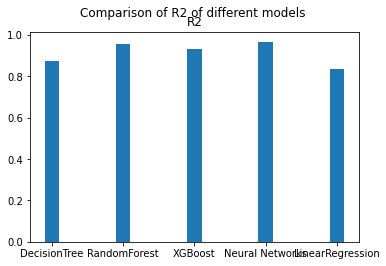

In [ ]:
# BAR PLOT TO COMPARE MODEL SCORES 

# results_r2 stores r2 values of different models.  
names=['DecisionTree','RandomForest', 'XGBoost', 'Neural Networks', 'LinearRegression']

import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=2,ncols=1)
ax1=plt.subplot(1,1,1)
ax1.bar(names, results_r2,width=0.2)

fig.tight_layout(pad=3.0)
fig.suptitle('Comparison of R2 of different models')
ax1.set_title('R2')

We hence choose the Random Forest and Neural Network models that we trained for the purpose of prediction. 

In [ ]:
test_data = pd.read_csv("v3_test_data.csv")

In [ ]:
test_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,...,Model_i20 Active S Diesel,Model_i20 Active SX Diesel,Model_i20 Active SX Dual Tone Petrol,Model_i20 Active SX Petrol,Model_i20 Asta,Model_i20 Asta (o),Model_i20 Asta (o) 1.4 CRDi (Diesel),Model_i20 Asta 1.2,Model_i20 Asta 1.4 CRDi,Model_i20 Asta 1.4 CRDi (Diesel),Model_i20 Asta Option 1.2,Model_i20 Asta Option 1.4 CRDi,Model_i20 Asta Optional with Sunroof 1.2,Model_i20 Diesel Asta Option,Model_i20 Era 1.4 CRDi,Model_i20 Magna,Model_i20 Magna 1.2,Model_i20 Magna 1.4 CRDi,Model_i20 Magna 1.4 CRDi (Diesel),Model_i20 Magna Optional 1.2,Model_i20 Magna Optional 1.4 CRDi,Model_i20 Sportz 1.2,Model_i20 Sportz 1.4 CRDi,Model_i20 Sportz AT 1.4,Model_i20 Sportz Diesel,Model_i20 Sportz Option,Model_i20 Sportz Option 1.2,Model_i20 Sportz Option Diesel,Model_i20 Sportz Petrol,Model_redi-GO S,Model_redi-GO T,Model_redi-GO T Option,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,16,40929,32.26,998.0,58.20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,15,54493,24.70,796.0,47.30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,19,34000,13.68,2393.0,147.80,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,16,29000,18.50,1197.0,82.85,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,18,85609,16.00,2179.0,140.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_data[['Kilometers_Driven','Mileage','Engine','Power']]=np.log1p(test_data[['Kilometers_Driven','Mileage','Engine','Power']])
test_data[['Kilometers_Driven','Mileage','Engine','Power']] = sc.fit_transform(test_data[['Kilometers_Driven','Mileage','Engine','Power']])

In [ ]:
len(test_data.columns.to_list())  # This is testing data. 

2099

In [ ]:
len(data.columns.to_list()) # This is training data. 
# The lengths are matching as well. 

2100

Data is sufficiently cleaned out for prediction. The same steps applied to train data were also applied to test data. 

In [ ]:
# Random Forest Prediction. 

pred_test = regressor.predict(test_data)


In [ ]:
pred_test

array([1.41000631, 1.39444989, 2.83814455, ..., 1.33063477, 1.76049952,
       2.94304085])

In [ ]:
pred_test = np.exp(pred_test)-1 #converting target to original state
pred_test = pred_test.round(2)
print(pred_test)

[ 3.1   3.03 16.08 ...  2.78  4.82 17.97]


In [ ]:
# Write predictions into csv file for submission. 

results = pd.DataFrame(data = pred_test)

df = results
df.to_csv('randomforest_predicted_price_results.csv')
!cp randomforest_predicted_price_results.csv "/content/drive/My Drive/Verzeo - Major Project/"

In [ ]:
# Neural Networks prediction. 

pred_test = model.predict(test_data)

In [ ]:
pred_test = np.exp(pred_test)-1 #converting target to original state
pred_test = pred_test.round(2)
print(pred_test)

[[ 3.22]
 [ 2.84]
 [17.45]
 ...
 [ 3.22]
 [ 4.52]
 [18.55]]


In [ ]:
# Write predictions into csv file for submission. 

results = pd.DataFrame(data = pred_test)

df = results
df.to_csv('neuralnet_predicted_price_results.csv')
!cp neuralnet_predicted_price_results.csv "/content/drive/My Drive/Verzeo - Major Project/"

Refer to the neuralnet_predicted_price_results.csv and randomforest_predicted_price_results.csv files for predictions by the respective models. 